<a href="https://colab.research.google.com/github/fddfbbnln/Old-Car-Price-Prediction-/blob/main/Old_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [175]:
dataset = pd.read_csv("cars24data.csv", dtype={'Model_Name': 'object', 'Transmission': 'object', 'Fuel_type': 'object'})

In [176]:
dataset.head(10)

,Model_Name,Manufacturing_year,Transmission,KM,Ownership,Fuel_type,Price
0,2017 Maruti Swift VXI,2017,Manual,25847,2,Petrol,561000
1,2016 Maruti Baleno DELTA PETROL 1.2,2016,Manual,55511,2,Petrol,498000
2,2020 Maruti Swift VXI,2020,Manual,47110,1,Petrol,577000
3,2022 Maruti Ertiga VXI AT SHVS,2022,Automatic,35378,1,Petrol,1084000
4,2019 Maruti Dzire VXI,2019,Manual,91856,1,Petrol,603000
5,2014 Maruti Alto 800 LXI,2014,Manual,43780,1,Petrol,233000
6,2020 Maruti Swift VXI,2020,Manual,49583,1,Petrol,593000
7,2018 Maruti Dzire VXI AMT,2018,Automatic,86837,2,Petrol,583000
8,2016 Maruti Swift Dzire VXI,2016,Manual,58570,2,Petrol,513000
9,2019 Maruti S PRESSO VXI,2019,Manual,50645,1,Petrol,378000


In [177]:
dataset.isnull().sum()

,0
Model_Name,0
Manufacturing_year,0
Transmission,0
KM,0
Ownership,0
Fuel_type,0
Price,0


In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model_Name          1445 non-null   object
 1   Manufacturing_year  1445 non-null   int64 
 2   Transmission        1445 non-null   object
 3   KM                  1445 non-null   int64 
 4   Ownership           1445 non-null   int64 
 5   Fuel_type           1445 non-null   object
 6   Price               1445 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 79.2+ KB


In [179]:
Model_Name_le = LabelEncoder()
dataset['Model_Name'] = Model_Name_le.fit_transform(dataset['Model_Name'])

In [180]:
Transmission_le = LabelEncoder()
dataset['Transmission'] = Transmission_le.fit_transform(dataset['Transmission'])

In [181]:
Fuel_type_le = LabelEncoder()
dataset['Fuel_type'] = Fuel_type_le.fit_transform(dataset['Fuel_type'])

In [182]:
input_data = dataset.iloc[:,:-1]
output_data = dataset["Price"]

In [183]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [184]:
input_data

,Model_Name,Manufacturing_year,Transmission,KM,Ownership,Fuel_type
0,-0.283678,-0.273755,0.588805,-0.905299,1.459809,0.359712
1,-0.891945,-0.608705,0.588805,0.180098,1.459809,0.359712
2,0.907512,0.731095,0.588805,-0.127292,-0.582228,0.359712
3,1.496771,1.400995,-1.698355,-0.556562,-0.582228,0.359712
4,0.394286,0.396145,0.588805,1.509950,-0.582228,0.359712
...,...,...,...,...,...,...
1440,1.122940,1.066045,0.588805,-1.122861,-0.582228,0.359712
1441,-1.063021,-0.943655,0.588805,-0.020743,-0.582228,0.359712
1442,0.273900,0.396145,0.588805,0.296014,-0.582228,0.359712
1443,-0.448417,-0.273755,0.588805,0.854702,1.459809,0.359712


In [185]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [186]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [187]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [188]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100 ,rf.score(x_test,y_test)*100

(97.2759620181315, 75.03633342696743)

In [189]:
mean_squared_error(y_test,rf.predict(x_test)) , mean_absolute_error(y_test,rf.predict(x_test))

(8317037523.183391, 62843.11418685121)

In [190]:
rf.predict([[-0.492770,-0.273755,0.588805,0.344532,3.501845,0.359712]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([432550.])

In [191]:
x_test

,Model_Name,Manufacturing_year,Transmission,KM,Ownership,Fuel_type
413,-0.492770,-0.273755,0.588805,0.344532,3.501845,0.359712
316,0.286572,0.396145,-1.698355,-0.947852,-0.582228,0.359712
1034,-0.347039,-0.273755,0.588805,-0.647341,-0.582228,0.359712
65,-1.208751,-1.278605,0.588805,0.143362,-0.582228,0.359712
1024,0.242219,0.396145,0.588805,-0.262162,-0.582228,0.359712
...,...,...,...,...,...,...
1107,-1.240432,-1.278605,0.588805,1.415842,-0.582228,-1.432645
86,0.711092,0.731095,0.588805,-0.015254,-0.582228,0.359712
1372,0.242219,0.396145,0.588805,0.254887,1.459809,0.359712
265,-1.164398,-0.943655,0.588805,0.670729,1.459809,-3.225002


In [192]:
y_test

,Price
413,331000
316,708000
1034,746000
65,429000
1024,329000
...,...
1107,530000
86,755000
1372,320000
265,237000


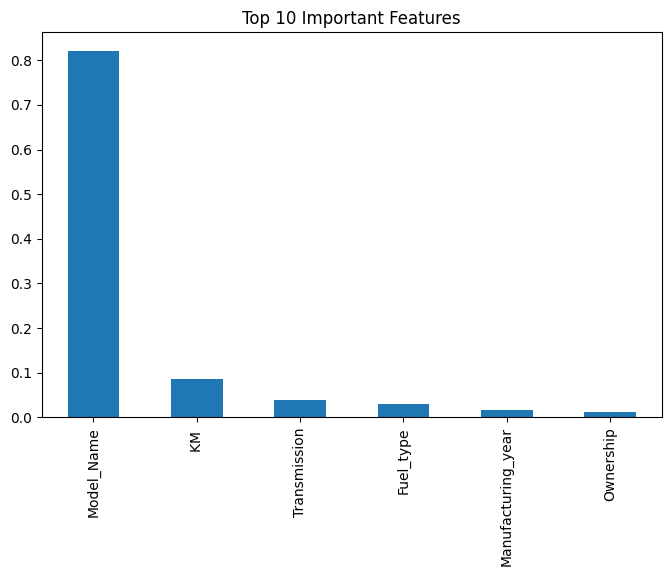

In [193]:
feature_importances = pd.Series(rf.feature_importances_, index=input_data.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Important Features")
plt.show()

In [194]:
joblib.dump(rf, "used_car_price_model.pkl")
print("✅ Model Saved as used_car_price_model.pkl")

✅ Model Saved as used_car_price_model.pkl


In [195]:
import joblib

In [196]:
new_data = pd.read_csv("cars24data.csv")
new_data = pd.get_dummies(new_data, drop_first=True)

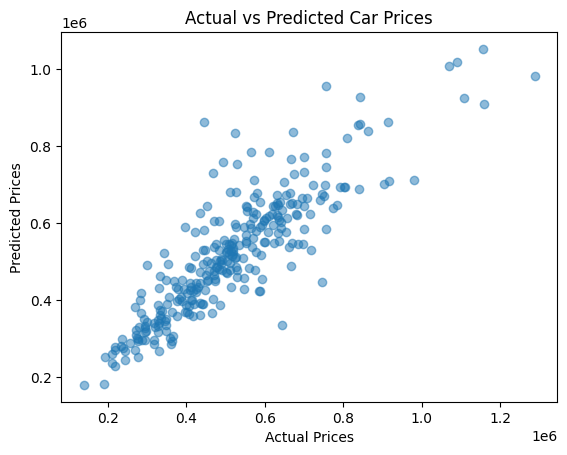

In [201]:
import matplotlib.pyplot as plt

y_pred = rf.predict(x_test)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

In [202]:
y_pred

array([ 432550.,  665640.,  445990.,  435150.,  334060.,  630190.,
        504880.,  839300.,  490670.,  419910.,  274710.,  268300.,
        622700.,  615600.,  516300.,  783850.,  349070.,  908590.,
        660590.,  318590.,  350040.,  494430.,  444580.,  513380.,
        253400.,  545120.,  687060.,  296730.,  551710.,  835670.,
        449230.,  400440.,  485610.,  575940.,  611850.,  643060.,
        559460.,  552580.,  764960.,  425860.,  617100.,  450740.,
        706630.,  419240.,  339610.,  644910.,  653880.,  406860.,
        316670.,  396920.,  366810.,  425150.,  401260.,  476770.,
        605270.,  577370.,  644900.,  820520.,  448780.,  982060.,
        457240.,  623740.,  294800.,  363900.,  553510.,  370050.,
        710520.,  181560.,  434200.,  732570.,  530470.,  277990.,
        391940.,  229640.,  652170.,  404110.,  551750.,  694770.,
        702380., 1007130.,  336260., 1017400.,  271130.,  343790.,
        572940.,  576120.,  524140.,  927270.,  549170.,  4771

In [204]:
output = pd.DataFrame({
    "Predicted_Price": y_pred
})
output.to_csv("predicted_prices.csv", index=False)
print("✅ Predictions saved to predicted_prices.csv")

✅ Predictions saved to predicted_prices.csv
